# Analyzing Data in Pandas

# Simulate the data set again

In [ ]:
import random
import numpy as np
import pandas as pd

# Simulate Responses
congruent_responses = np.random.choice(["incorrect", "correct"], size=(50,), p=[3./4, 1./4])
incongruent_responses = np.random.choice(["incorrect", "correct"], size=(50,), p=[1./4, 3./4])

# Simulate Reaction Times
a = 0.5 # lowest possible reaction time
b = 6 # highest possible reaction time
reaction_time_incongruent = []
reaction_time_congruent = []
for i in range(50):
    x = 4 # mode of reaction time
    reaction_time_incongruent.append(random.triangular(a, b, 3*x - a - b))
    x = 3 # mode of reaction time
    reaction_time_congruent.append(random.triangular(a, b, 3*x - a - b))

# Compile Data
data_tuples = list(zip(congruent_responses, incongruent_responses, reaction_time_incongruent, reaction_time_congruent))
df = pd.DataFrame(data_tuples, columns=["Incongruent Response", "Congruent Response", "Incongruent RT", "Congruent RT"]) # columns can be defined here too
df.head()

## Let's simulate a couple more variables here to help us learn data analysis in Python

In [ ]:
preference_for_apples = []
preference_for_crabs = []
a=1
b=100
for i in range(50):
    x = 75
    preference_for_apples.append(random.triangular(a, b, 3*x - a - b))
    x = 35
    preference_for_crabs.append(random.triangular(a, b, 3*x - a - b))

data_tuples = list(zip(preference_for_apples, preference_for_crabs))
df2 = pd.DataFrame(data_tuples, columns=["Apple Preference", "Crab Preference"]) # columns can be defined here too
df2.head()

### Concatenate the dataframes

In [ ]:
df = pd.concat([df,df2], axis=1, sort=False)
df.head()

## Calculate the mean reaction times using the `mean()` method.

In [ ]:
print(df['Incongruent RT'].mean())
print(df['Congruent RT'].mean())

## Calculate the median reaction times using the `median()` method.

In [ ]:
print(df['Incongruent RT'].median())
print(df['Congruent RT'].median())

## Calculate the mode of responses times using the `mode()` method.
Here we're calculating the mode of responses instead of reaction times because `mode()` calculates the most often occuring value.  Our reaction times are all unique values, so the mode function just returns the original data.  If we want to see the mode method in action, we can use it on the responses, and see what the most often occuring responses are in each category.

In [ ]:
print(df['Incongruent Response'].mode())
print(df['Congruent Response'].mode())

## Calculate the standard deviation of the reaction times using the `stdev()` method.

In [ ]:
print(df['Incongruent RT'].std())
print(df['Congruent RT'].std())

<h2>Functions &amp; Description</h2>
<p>Let us now understand the functions under Descriptive Statistics in Python Pandas. The following table list down the important functions &minus;</p>
<table class="table table-bordered">
<tr>
<th style="text-align:center;">Sr.No.</th>
<th style="text-align:center;">Function</th>
<th style="text-align:center;">Description</th>
</tr>
<tr>
<td style="text-align:center;">1</td>
<td style="text-align:center;">count()</td>
<td>Number of non-null observations</td>
</tr>
<tr>
<td style="text-align:center;">2</td>
<td style="text-align:center;">sum()</td>
<td>Sum of values</td>
</tr>
<tr>
<td style="text-align:center;">3</td>
<td style="text-align:center;">mean()</td>
<td>Mean of Values</td>
</tr>
<tr>
<td style="text-align:center;">4</td>
<td style="text-align:center;">median()</td>
<td>Median of Values</td>
</tr>
<tr>
<td style="text-align:center;">5</td>
<td style="text-align:center;">mode()</td>
<td>Mode of values</td>
</tr>
<tr>
<td style="text-align:center;">6</td>
<td style="text-align:center;">std()</td>
<td>Standard Deviation of the Values</td>
</tr>
<tr>
<td style="text-align:center;">7</td>
<td style="text-align:center;">min()</td>
<td>Minimum Value</td>
</tr>
<tr>
<td style="text-align:center;">8</td>
<td style="text-align:center;">max()</td>
<td>Maximum Value</td>
</tr>
<tr>
<td style="text-align:center;">9</td>
<td style="text-align:center;">abs()</td>
<td>Absolute Value</td>
</tr>
<tr>
<td style="text-align:center;">10</td>
<td style="text-align:center;">prod()</td>
<td>Product of Values</td>
</tr>
<tr>
<td style="text-align:center;">11</td>
<td style="text-align:center;">cumsum()</td>
<td>Cumulative Sum</td>
</tr>
<tr>
<td style="text-align:center;">12</td>
<td style="text-align:center;">cumprod()</td>
<td>Cumulative Product</td>
</tr>
</table>

https://www.tutorialspoint.com/python_pandas/python_pandas_descriptive_statistics.htm

## Describe the data gives a summary of the numerical data in a given dataset

In [ ]:
df.describe()

### We can use `=object` to see info about cells that contain objects, not numbers.  This includes text, like our response variables

In [ ]:
df.describe(include=['object'])

### We can use `=all` to see all of that info at once.  `NaN` stands for  `not a number`, which is Pandas' N/A value

In [ ]:
df. describe(include='all')

# Test for normal distribution
Let's see if our data are normally distributed.

To do that, we'll use the `scipy` module. `scipy` stands for scientific python.  In the `stats` folder, there's a module called pearsonr, which calculates correlations and corresponding p-values. `scipy` is compatable with `Pandas`.  If the p-value is less than 0.05, then the distribution is not normal.

In [ ]:
import scipy.stats

print(scipy.stats.normaltest(df['Incongruent RT']))
print(scipy.stats.normaltest(df['Congruent RT']))

## Correlation
To test for a correlation in Pandas, you can use the `corr()` method to test for all correlations in a dataset.  This is called a correlation matrix.  It's not particularly useful for our analysis here, but it's something you should learn.

In [62]:
df.corr()

,Incongruent RT,Congruent RT,Apple Preference,Crab Preference
Incongruent RT,1.000000,-0.227141,-0.154159,-0.337268
Congruent RT,-0.227141,1.000000,0.093086,-0.042904
Apple Preference,-0.154159,0.093086,1.000000,-0.329471
Crab Preference,-0.337268,-0.042904,-0.329471,1.000000


If you just want to correlate 2 variables, you can call the `corr()` method on one column, and put the other column inside the `corr` method.

In [63]:
df['Incongruent RT'].corr(df['Congruent RT'])

-0.22714103075635755

### p-values for correlations
p-value politics aside, you should learn how to calculate them.  We can't do that in Pandas, but we can do it in `scipy.stats.pearsonr`. `scipy.stats.pearsonr` returns a tuple.  The first value is the r-value or correlation coefficient.  The second value is the p-value.

In [64]:
import scipy.stats

scipy.stats.pearsonr(df['Incongruent RT'], df['Congruent RT'])

(-0.22714103075635758, 0.11266703493324166)

Those two variables are not related, and we would not be surprised to find that given our null hypothesis (i.e. that the two variables are not related)

# Are RT's in the incongruent condition longer than the RT's in the congruent condition?

To do that, we'll use a paired sample t-test `scipy.stats.ttest_rel`.  

In [65]:
scipy.stats.ttest_rel(df['Incongruent RT'], df['Congruent RT'])

Ttest_relResult(statistic=3.918447945115612, pvalue=0.0002763808275058839)

The t-value of 5.6 tells us that the mean of incongruent is much higher than the mean of congruent, and the p-value of 8.153 e-07 means we would be very very suprised if we reached this result given the null hypothesis that there is no differnece in the means.

## In each condition, is the frequency of "correct" responses different than we would expect than if people were just guessing?

x is the number of correct responses - we already calculated this last time.
n is the sample size (50)
p is the probability of being correct if there was no effect of the letter colour (1)

### Congruent

In [66]:
proportion_correct_congruent = (df[df["Congruent Response"] == "correct"].count(axis=0) / 50)[0]
print('Proportion correct congruent', proportion_correct_congruent)
scipy.stats.binom_test(proportion_correct_congruent, n=50, p=0.99)

Proportion correct congruent 0.8


1.0000000000000444e-100

### Incongruent

In [69]:
proportion_correct_incongruent = (df[df["Incongruent Response"] == "correct"].count(axis=0) / 50)[0]
print('Proportion correct incongruent', proportion_correct_incongruent)
scipy.stats.binom_test(proportion_correct_incongruent, n=50, p=0.99)

Proportion correct incongruent 0.24


1.0000000000000444e-100

In both cases, there is almost a zero probability that the observed responses are the same as we would expect if there was no effect of the colour on the word people read. Had we used p=1, there would be a zero probability.

# Saving Your Data to a file

There are many formats you can save your data to.  Python doesn't care, it can save in any non-proprietary format (and some proprietary ones too).

You can save:

CSV (comma-separated values)

In [75]:
df.to_csv(r'simulated_data.csv')
import os
os.getcwd()
os.listdir()
os.

['README.md',
 'Class-03-Dictionaries_Functions_and_Methods.ipynb',
 'Class-02-Conditionals_DataTypes_and_Loops.slides.html',
 'seaborn_plot.png',
 'Class-11-AnalyzingDataInPandas.ipynb',
 'Class-07-Namespaces.ipynb',
 'reaction_times.png',
 'Class-10-ExploringDataInPandas.ipynb',
 'Class-12-PlottingDataInPython.ipynb',
 'simulated_data.pkl',
 '.~lock.simulated_data.xlsx#',
 'Class-09-Psychopy-2-Responses.ipynb',
 '.ipynb_checkpoints',
 'data',
 '__pycache__',
 'data.csv',
 'Class-06-Objects.ipynb',
 'Class-00-Introduction.ipynb',
 'Class-04-Debugging.ipynb',
 'Class-02-Conditionals_DataTypes_and_Loops.ipynb',
 'simulated_data.csv',
 'Untitled.ipynb',
 'simulated_data.xlsx',
 'my_favourite_song.webm',
 'individual_files',
 'Class-01-Variables_and_Operators.ipynb',
 'Class-08-PsychoPy-1-Stimuli.ipynb',
 'Class-05-Classes.ipynb',
 'video.mp4',
 'external_code.py',
 'img',
 'my_favourite_song.mp4']

Excel

In [77]:
df.to_excel('simulated_data.xlsx')

You can also save your objects by pickling them.  These objects can be loaded into other Python programs directly.  Whether it's a dataframe or any other Python object, it can be pickled.

In [78]:
df.to_pickle('simulated_data.pkl')

# Basic Linear Model in Tensor Flow
## Tensor Flow is a library used for Machine Learning and Neural Networks

First we train a model, then we test it.

### Import Tensor Flow & pick our variables

In [79]:
import sklearn.preprocessing
import tensorflow as tf
import pandas as pd

#%%
tf.enable_eager_execution()
print(tf.__version__)

#%%
x = df["Incongruent RT"].values
y = df["Congruent RT"].values

1.14.0


### Scale our data using a z-score

In [81]:
preprocessing_method = sklearn.preprocessing.StandardScaler()
x = x.reshape(-1,1)
x = preprocessing_method.fit_transform(x)
x

array([[ 6.89573382e-02],
       [ 1.30790577e+00],
       [-2.57848455e-01],
       [-1.89863492e+00],
       [ 1.26681070e+00],
       [-1.76129791e+00],
       [ 1.36546468e+00],
       [-7.92626869e-01],
       [ 3.69653675e-02],
       [ 6.05494610e-01],
       [ 1.04440493e-01],
       [-4.18331988e-01],
       [-7.95129617e-01],
       [ 9.12177907e-01],
       [ 2.18703453e-01],
       [ 6.36637022e-01],
       [ 1.06910655e+00],
       [-9.79346793e-01],
       [ 1.48720783e+00],
       [-9.20709178e-01],
       [ 5.40855858e-01],
       [-6.48569567e-01],
       [ 9.32108779e-01],
       [-1.55445092e+00],
       [-3.38062509e-01],
       [-1.80990734e+00],
       [-3.18871154e-01],
       [ 2.76718116e-01],
       [-1.66389648e+00],
       [ 1.01370625e+00],
       [ 1.31814091e+00],
       [ 6.12343820e-01],
       [ 1.31356876e+00],
       [ 2.40562730e-01],
       [ 2.84823489e-01],
       [-9.23460358e-04],
       [-1.25619233e+00],
       [-2.75991343e-01],
       [-2.0

### Create a Linear Model Object
Initialize slope and interecept with 'random' values

In [82]:
#%%
class LinearModel:
    def __call__(self, x):
        return self.Weight * x + self.Bias  # our linear regression equation

    def __init__(self):  # initializes the weight and bias randomly
        self.Weight = tf.Variable(11.0) 
        self.Bias = tf.Variable(12.0)

### Define our loss function.  We want to minimize mean squared error

In [83]:
def loss(y, pred):
    return tf.reduce_mean(tf.square(y - pred))  # This is our loss function.  We run the regression and minimize this value

### Train the model
Fit the model to (a subset) of the data.  We are only training the data today, so we don't need to subset our data.  

In this regard, we are simply running many linear regressions the same way we learned in class, and finding the best slope and intercept to minimize the mean-squared error

In [85]:
def train(linear_model, x, y, lr=0.12):  #  Gradient tape helps back propigate error to minimize the loss function
    with tf.GradientTape() as t:
        current_loss = loss(y, linear_model(x))

    lr_weight, lr_bias = t.gradient(current_loss, [linear_model.Weight, linear_model.Bias])
    linear_model.Weight.assign_sub(lr * lr_weight)
    linear_model.Bias.assign_sub(lr * lr_bias)

linear_model = LinearModel()
Weights, Biases = [], []
epochs = 30  # How many times do we run the regression?

### Epochs are essentially the number of times we run the regression

In [86]:
for epoch_count in range(epochs):
    Weights.append(linear_model.Weight.numpy())
    Biases.append(linear_model.Bias.numpy())
    real_loss = loss(y, linear_model(x))
    train(linear_model, x, y, lr=0.1)  # lr is how fast we minimize the loss function...  If we do it too fast, we over fit our data
    print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")

Epoch count 0: Loss value: 209.2376708984375
Epoch count 1: Loss value: 134.32492065429688
Epoch count 2: Loss value: 86.38072204589844
Epoch count 3: Loss value: 55.696475982666016
Epoch count 4: Loss value: 36.05852127075195
Epoch count 5: Loss value: 23.49024772644043
Epoch count 6: Loss value: 15.446550369262695
Epoch count 7: Loss value: 10.29858112335205
Epoch count 8: Loss value: 7.003884315490723
Epoch count 9: Loss value: 4.895277500152588
Epoch count 10: Loss value: 3.5457661151885986
Epoch count 11: Loss value: 2.682081699371338
Epoch count 12: Loss value: 2.129322052001953
Epoch count 13: Loss value: 1.775557041168213
Epoch count 14: Loss value: 1.5491466522216797
Epoch count 15: Loss value: 1.4042447805404663
Epoch count 16: Loss value: 1.311507225036621
Epoch count 17: Loss value: 1.2521556615829468
Epoch count 18: Loss value: 1.2141695022583008
Epoch count 19: Loss value: 1.189859390258789
Epoch count 20: Loss value: 1.174301028251648
Epoch count 21: Loss value: 1.164342

### Print the results

In [87]:
print('slope = ', linear_model.Weight.numpy(), '\nintercept', linear_model.Bias.numpy())  # slope is weight, intercept is bias
RMSE = loss(y, linear_model(x))
print('RMSE', RMSE.numpy())

slope =  0.013617331 
intercept 2.6792932
RMSE 1.1469595


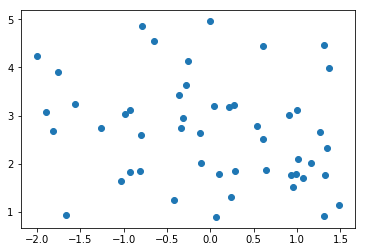

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x, y)

In [89]:
weight = linear_model.Weight.numpy()
bias = linear_model.Bias.numpy()
predictions = weight * x + bias 

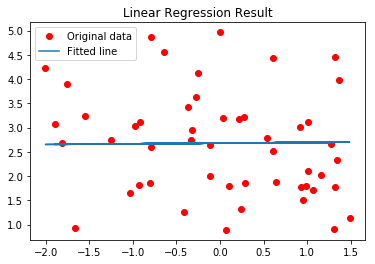

In [90]:
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 